In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train_df = pd.read_csv('data/train_filled.csv', parse_dates=["Date"])

In [7]:
train_df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,38.000000,38.000000,0.000000,38.000000,38.000000,38.000000,76.536426,38.593017,-61.752587,22.363665,38.000000,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,5

[Text(0.5, 1.0, 'Air Quality')]

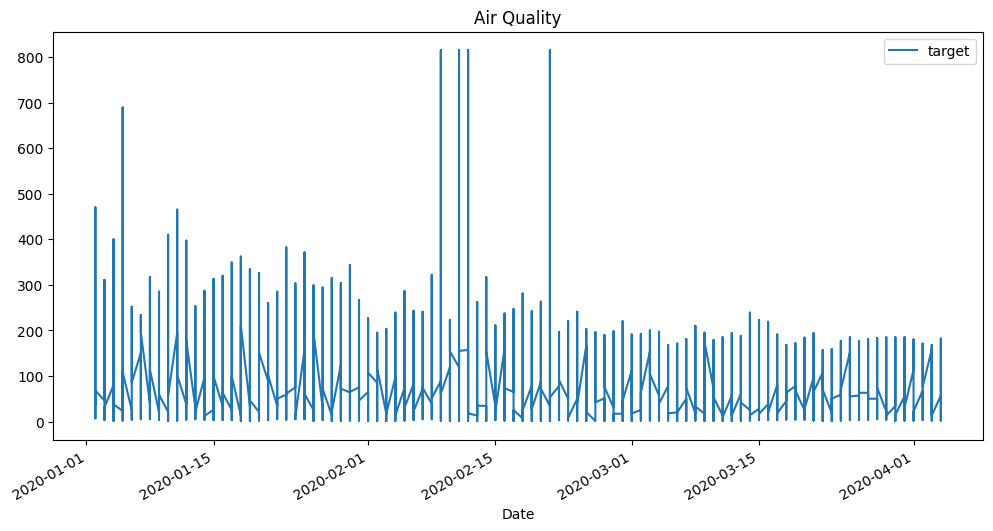

In [9]:
# Before removing outliers
fig, ax = plt.subplots(figsize=(12, 6))
train_df.plot('Date', 'target', ax=ax)
ax.set(title='Air Quality')

In [10]:
def preprocess_train(train_df):
    train_df=train_df.drop(columns=['target_min', 'target_max', 'target_variance', 'target_count'], axis=1)
    
    train_df['saleyear'] = train_df.Date.dt.year
    train_df['salemonth'] = train_df.Date.dt.month
    train_df['saleday'] = train_df.Date.dt.day
    train_df['saledayofweek'] = train_df.Date.dt.day_of_week
    train_df['saledayofyear'] = train_df.Date.dt.day_of_year
    
    train_df['placeID_freq'] = train_df['Place_ID'].map(train_df['Place_ID'].value_counts())
    
    # Drop features that corrolate with other features
    train_df= train_df.drop(columns=['L3_SO2_SO2_column_number_density_amf','L3_NO2_stratospheric_NO2_column_number_density','L3_CLOUD_sensor_azimuth_angle','L3_HCHO_solar_azimuth_angle','L3_SO2_sensor_zenith_angle','L3_CH4_solar_zenith_angle','temperature_2m_above_ground','L3_NO2_absorbing_aerosol_index','L3_CO_sensor_azimuth_angle','L3_AER_AI_sensor_zenith_angle','L3_AER_AI_solar_azimuth_angle','L3_AER_AI_solar_zenith_angle','L3_CO_sensor_zenith_angle','L3_HCHO_sensor_zenith_angle','L3_HCHO_tropospheric_HCHO_column_number_density_amf','L3_SO2_sensor_azimuth_angle','L3_SO2_absorbing_aerosol_index','L3_CH4_sensor_zenith_angle','specific_humidity_2m_above_ground','L3_NO2_NO2_slant_column_number_density','L3_NO2_cloud_fraction','L3_NO2_tropopause_pressure','L3_O3_sensor_azimuth_angle','L3_O3_cloud_fraction','L3_CLOUD_sensor_zenith_angle','L3_CLOUD_solar_azimuth_angle','L3_CLOUD_solar_zenith_angle','L3_CO_sensor_altitude','L3_HCHO_sensor_azimuth_angle','L3_CO_solar_zenith_angle','L3_HCHO_cloud_fraction','L3_HCHO_solar_zenith_angle','L3_HCHO_tropospheric_HCHO_column_number_density','L3_SO2_SO2_column_number_density','L3_CLOUD_cloud_top_height','L3_CLOUD_cloud_top_pressure','L3_AER_AI_absorbing_aerosol_index','L3_AER_AI_sensor_azimuth_angle','L3_SO2_SO2_slant_column_number_density','L3_SO2_cloud_fraction','L3_SO2_solar_zenith_angle','L3_CH4_aerosol_height','L3_CH4_sensor_azimuth_angle','L3_CH4_solar_azimuth_angle','Place_ID X Date'], axis=1)
    
    # by removing data above the 95th percentile
    removed_col = ['precipitable_water_entire_atmosphere','L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle','L3_NO2_solar_zenith_angle','L3_NO2_tropospheric_NO2_column_number_density','L3_O3_O3_column_number_density','L3_O3_O3_effective_temperature','L3_O3_solar_zenith_angle','L3_CO_CO_column_number_density','L3_CO_solar_azimuth_angle','L3_CLOUD_cloud_base_pressure','L3_CLOUD_surface_albedo','L3_SO2_solar_azimuth_angle','L3_CH4_aerosol_optical_depth']
    col = ['u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_sensor_azimuth_angle', 'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle','L3_CO_H2O_column_number_density', 'L3_CO_cloud_height','L3_HCHO_HCHO_slant_column_number_density', 'L3_CLOUD_cloud_base_height','L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth', 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air']
    for co in col:
        q_cutoff = train_df[co].quantile(0.95)
        mask = train_df[co] < q_cutoff

        train_df = train_df[mask]
        
    return train_df

train=preprocess_train(train_df)

In [11]:
train.head()

,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_surface_albedo,L3_AER_AI_sensor_altitude,L3_SO2_solar_azimuth_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_optical_depth,saleyear,salemonth,saleday,saledayofweek,saledayofyear,placeID_freq
1,2020-01-03,010Q650,39.0,14.600000,48.799999,3.330430,-1.188108,0.000076,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000021,0.115179,233.313706,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,-74.457583,0.000114,175.019862,99354.162958,0.059358,5.958538,0.315403,840772.941995,-67.693509,1789.960449,0.015104,2020,1,3,4,3,94
2,2020-01-04,010Q650,24.0,16.400000,33.400002,5.065727,3.500559,0.000067,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000007,0.115876,232.233484,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,-78.355069,0.000027,275.903991,98118.935248,0.082247,5.755760,0.307463,841410.713456,-78.342701,32.000000,32.000000,2020,1,4,5,4,94
3,2020-01-05,010Q650,49.0,6.911948,21.300001,3.004001,1.099468,0.000083,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000023,0.141557,230.936229,29.181258,-73.896588,30.545446,0.021207,1061.570832,474.821444,-73.914571,0.000023,383.692363,97258.462755,0.121555,6.246885,0.279637,841103.242368,-73.896588,32.500000,32.500000,2020,1,5,6,5,94
4,2020-01-06,010Q650,21.0,13.900001,44.700001,2.621787,2.670559,0.000070,840763.055499,58.850179,0.797294,-68.612480,26.899694,0.000009,0.126369,232.499132,0.797294,-68.612480,26.899694,0.037766,1044.247425,926.926310,-68.622851,0.000037,4314.483127,59875.027957,0.037008,4.205691,0.238241,840763.055499,-68.612480,30.500000,30.500000,2020,1,6,0,6,94
6,2020-01-08,010Q650,21.0,15.600000,47.100002,2.221650,-0.931121,0.000060,840805.255366,-6.120488,57.948107,-66.631977,28.760492,28.500000,0.129761,232.385720,57.967552,-66.603329,28.762905,0.036858,1191.689748,1956.054043,-53.931674,-0.000130,1927.026835,80725.360547,0.491667,24.610530,0.352787,840805.255366,-71.908414,28.500000,28.500000,2020,1,8,2,8,94


[Text(0.5, 1.0, 'Air Quality')]

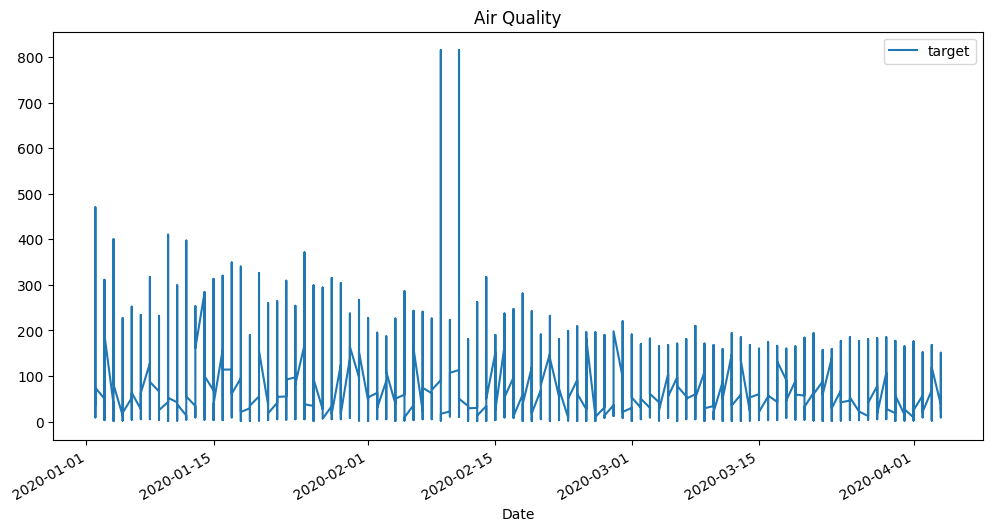

In [13]:
# After removing outliers
fig, ax = plt.subplots(figsize=(12, 6))
train.plot('Date', 'target', ax=ax)
ax.set(title='Air Quality')

In [45]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [46]:
agg = series_to_supervised(train)

In [52]:
df = pd.DataFrame(agg)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,2020-01-03,010Q650,39.0,14.6,48.799999,3.33043,-1.188108,0.000076,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000021,0.115179,233.313706,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,-74.457583,0.000114,175.019862,99354.162958,0.059358,5.958538,0.315403,840772.941995,-67.693509,1789.960449,0.015104,2020.0,1.0,3.0,4.0,3.0,94.0,2020-01-04,010Q650,24.0,16.4,33.400002,5.065727,3.500559,0.000067,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000007,0.115876,232.233484,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,-78.355069,0.000027,275.903991,98118.935248,0.082247,5.75576,0.307463,841410.713456,-78.342701,32.0,32.0,2020,1,4,5,4,94
1,2020-01-04,010Q650,24.0,16.4,33.400002,5.065727,3.500559,0.000067,841410.713456,-105.201338,49.839714,-78.342701,34.296977,0.000007,0.115876,232.233484,49.839714,-78.342701,34.296977,0.020677,1109.347101,134.700335,-78.355069,0.000027,275.903991,98118.935248,0.082247,5.75576,0.307463,841410.713456,-78.342701,32.0,32.0,2020.0,1.0,4.0,5.0,4.0,94.0,2020-01-05,010Q650,49.0,6.911948,21.300001,3.004001,1.099468,0.000083,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000023,0.141557,230.936229,29.181258,-73.896588,30.545446,0.021207,1061.570832,474.821444,-73.914571,0.000023,383.692363,97258.462755,0.121555,6.246885,0.279637,841103.242368,-73.896588,32.5,32.5,2020,1,5,6,5,94
2,2020-01-05,010Q650,49.0,6.911948,21.300001,3.004001,1.099468,0.000083,841103.242368,-104.334056,29.180977,-73.896572,30.545393,0.000023,0.141557,230.936229,29.181258,-73.896588,30.545446,0.021207,1061.570832,474.821444,-73.914571,0.000023,383.692363,97258.462755,0.121555,6.246885,0.279637,841103.242368,-73.896588,32.5,32.5,2020.0,1.0,5.0,6.0,5.0,94.0,2020-01-06,010Q650,21.0,13.900001,44.700001,2.621787,2.670559,0.00007,840763.055499,58.850179,0.797294,-68.61248,26.899694,0.000009,0.126369,232.499132,0.797294,-68.61248,26.899694,0.037766,1044.247425,926.92631,-68.622851,0.000037,4314.483127,59875.027957,0.037008,4.205691,0.238241,840763.055499,-68.61248,30.5,30.5,2020,1,6,0,6,94
3,2020-01-06,010Q650,21.0,13.900001,44.700001,2.621787,2.670559,0.00007,840763.055499,58.850179,0.797294,-68.61248,26.899694,0.000009,0.126369,232.499132,0.797294,-68.61248,26.899694,0.037766,1044.247425,926.92631,-68.622851,0.000037,4314.483127,59875.027957,0.037008,4.205691,0.238241,840763.055499,-68.61248,30.5,30.5,2020.0,1.0,6.0,0.0,6.0,94.0,2020-01-08,010Q650,21.0,15.6,47.100002,2.22165,-0.931121,0.00006,840805.255366,-6.120488,57.948107,-66.631977,28.760492,28.5,0.129761,232.38572,57.967552,-66.603329,28.762905,0.036858,1191.689748,1956.054043,-53.931674,-0.00013,1927.026835,80725.360547,0.491667,24.61053,0.352787,840805.255366,-71.908414,28.5,28.5,2020,1,8,2,8,94
4,2020-01-08,010Q650,21.0,15.6,47.100002,2.22165,-0.931121,0.00006,840805.255366,-6.120488,57.948107,-66.631977,28.760492,28.5,0.129761,232.38572,57.967552,-66.603329,28.762905,0.036858,1191.689748,1956.054043,-53.931674,-0.00013,1927.026835,80725.360547,0.491667,24.61053,0.352787,840805.255366,-71.908414,28.5,28.5,2020.0,1.0,8.0,2.0,8.0,94.0,2020-01-09,010Q650,18.0,18.6,62.400002,3.287685,-0.880361,0.000068,840508.551309,-13.662432,59.674296,-60.765053,26.396956,0.000008,0.129769,232.94915,59.674296,-60.765053,26.396956,0.035093,1111.117433,634.250253,-60.734102,0.000001,1260.406455,88269.896619,0.042775,5.347519,0.29219,840508.551309,-60.765053,17.0,17.0,2020,1,9,3,9,94


In [ ]:
import xgboost as xgb

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_squared_error(test[:, -1], predictions)
    return error, test[:, 1], predictions